# Basic tutorial: ``Interleaving`` class

This class encodes all the information needed to figureout an interleaving between two ``MapperGraph`` instances. 


In [1]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt

## A first example

We have two example Mapper graphs to work with. 

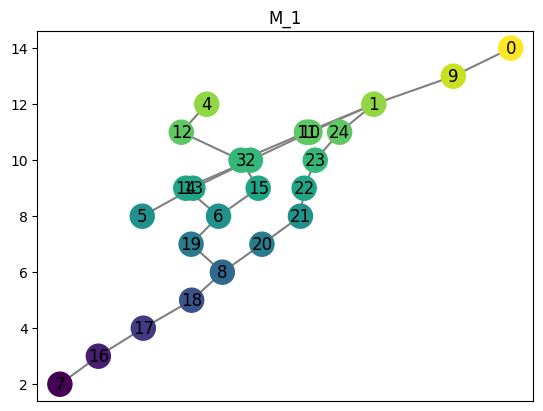

In [2]:
M1 = ex_mg.interleave_example_A()
M1.draw()
plt.title('M_1');

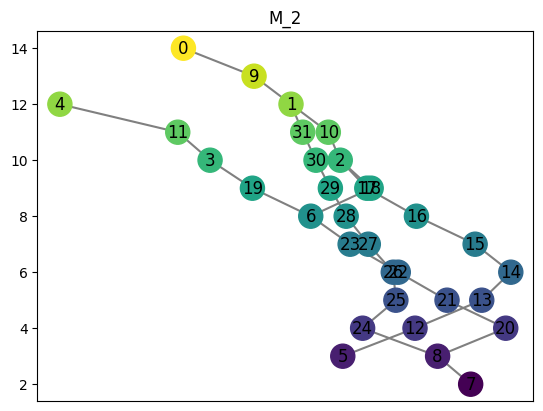

In [3]:
M2 = ex_mg.interleave_example_B()
M2.draw()
plt.title('M_2');

We can create an instance of the interleaving class to store all the relevant matrices and smoothed graphs. 

In [4]:
myInt = Interleave(M1, M2)

Inside of the  `Interleave` class, we have lots of setup data ready to go. 

Internally, the two graphs are labeled as $F$ and $G$, and an interleaving itself is a pair of maps $\phi:F \to G^n$ and $\psi: G \to F^n$. 

First we have the two original graphs stored as follows. The $F$ graphs for $0$, $n$, and $2n$ are in a dictionary `myInt.F` with keys `['0','n','2n']`. (Note the `0` is a string, not an integer).

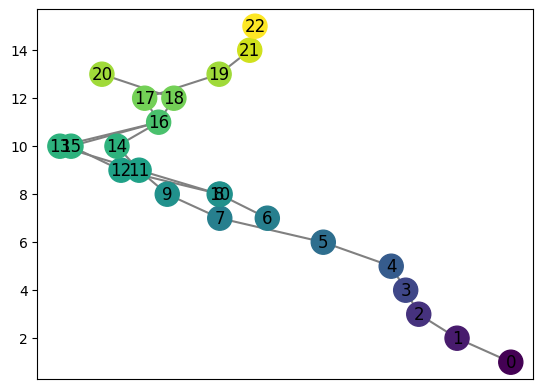

In [5]:
myInt.F('n').draw()

In [6]:
for key in ['0', 'n', '2n']:
    print(f"F_{key}: {myInt.F(key).summary()}")

F_0: {'nodes': 25, 'edges': 26}
F_n: {'nodes': 23, 'edges': 24}
F_2n: {'nodes': 22, 'edges': 22}


Similarly, we have a dictionary of the $G$ graphs. 

In [7]:
for key in ['0', 'n', '2n']:
    print(f"G_{key}: {myInt.G(key).summary()}")

G_0: {'nodes': 32, 'edges': 32}
G_n: {'nodes': 32, 'edges': 32}
G_2n: {'nodes': 32, 'edges': 32}


All the graphs can be drawn at once with the following command.

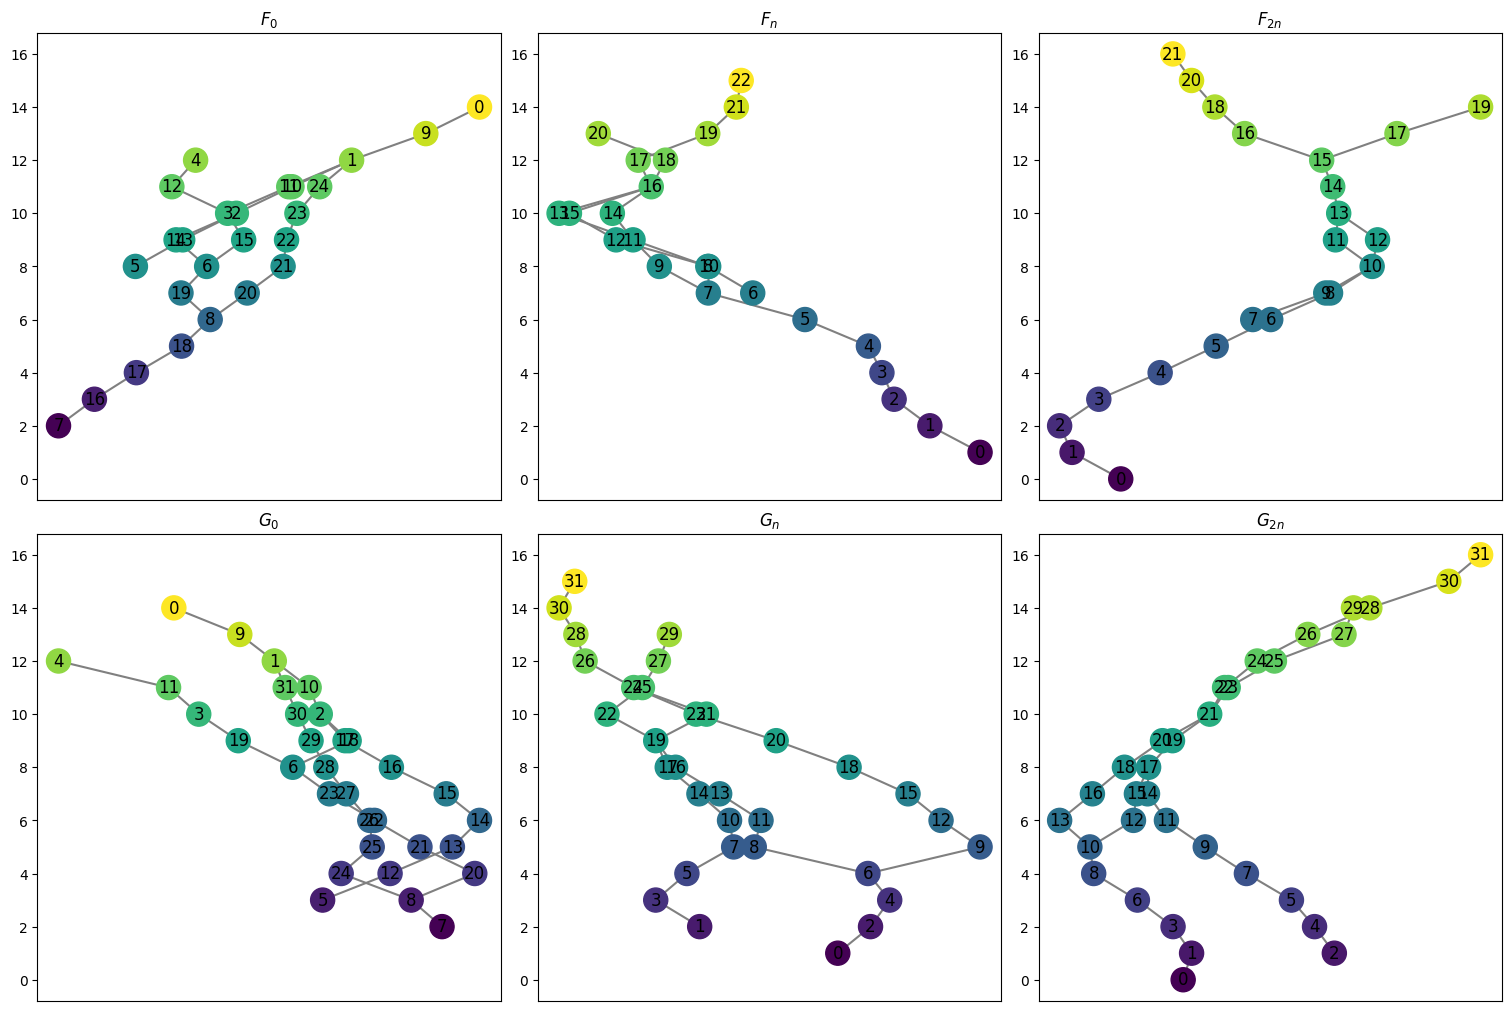

In [8]:
myInt.draw_all_graphs();

### Matrices 

There are many matrices stored in the `Interleave` class, but since these are largely block matrices due to the function preserving restriction on the maps, we store these in the following structure. 

A block dictionary is a dictionary with keys as the integer function values for the relevant graphs. Each key $i$ maps to another dictionary with keys
- `array`: the matrix for the $i$ th block
- `rows`: A list of the vertices (or edges) in order represented in the rows of the matrix
- `cols`: A list of the vertices (or edges) in order represented in the rows of the matrix. 

#### Inclusion Matrices
The first block matrices are the inclusion matrices, which can be accessed by calling `Interleave.I`. These matrices give the maps $F \to F_n \to F_{2n}$ and $G \to G_n \to G_{2n}$. 

In [9]:
# For example, the induced inclusion map from $G$ to $G_{n}$ for the vertices is given by:
myInt.I('G','n','V')

# The block of the diagram sending vertices with function value 7 in $V(F_n)$ to vertices with value 7 in $V(F_{2n})$ is given by:
myInt.I('F','n','V')[7]

LabeledMatrix(
array=
[[0. 1.]
 [1. 0.]], 
rows=[8, 9], 
cols=[6, 7])

Reading the output above, we see that vertex 6 in $F_n$ is sent to vertex $8$ in $F_{2n}$, while vertex 7 in $F_n$ is sent to vertex $9$ in $F_{2n}$

Each map is stored as a `LabeledBlockMatrix` type. See [the documentation](../modules/distance/labeled_blocks.rst) for further details. The full matrix with all the blocks in place can be accessed as follows. 

In [10]:
myInt.I('G','n','V').to_labeled_matrix()

LabeledMatrix(
array=
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]], 
rows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 
cols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

And for visualizing, we can use the draw function to plot the matrix with rows and columns labeled accordingly. The `filltype = 'nan'` part makes the drawing function include anything outside the blocks as white, making the block structure easier to visualize.  

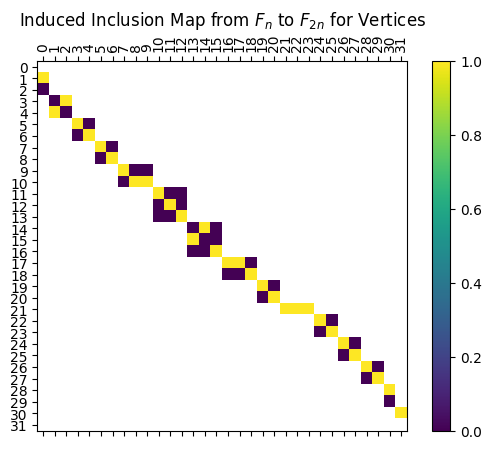

In [11]:
myInt.I('G','n','V').draw(filltype = 'nan', colorbar = True);
plt.title(r'Induced Inclusion Map from $F_n$ to $F_{2n}$ for Vertices');

We also have the induced maps for edges. This can be found as follows, or the full matrix can be drawn directly using the `draw_I` command. Note that the third entry for edge labels comes from the `nx.MultiDiGraph` parent class. 

LabeledMatrix(
array=
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]], 
rows=[(14, 17, 0), (15, 17, 0), (16, 18, 0)], 
cols=[(13, 16, 0), (14, 17, 0), (15, 18, 0)])


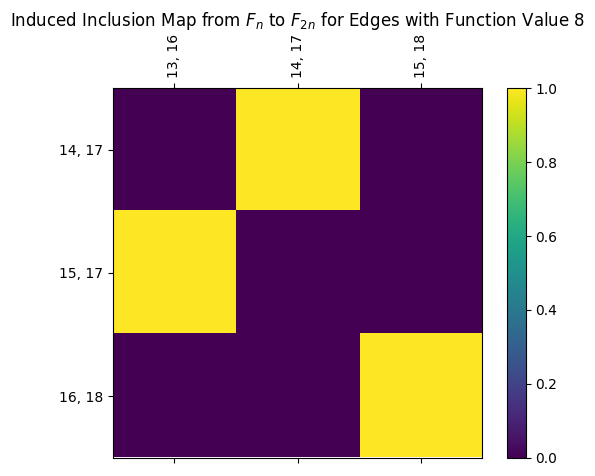

In [12]:
print(myInt.I('G','n','E')[7])

myInt.I('G','n','E')[7].draw(colorbar = True)
plt.title(r'Induced Inclusion Map from $F_n$ to $F_{2n}$ for Edges with Function Value 8');

There are also commands to draw individual $I$ maps using `Interleave.drawI`. The command below draws all of these at once for convenience. 

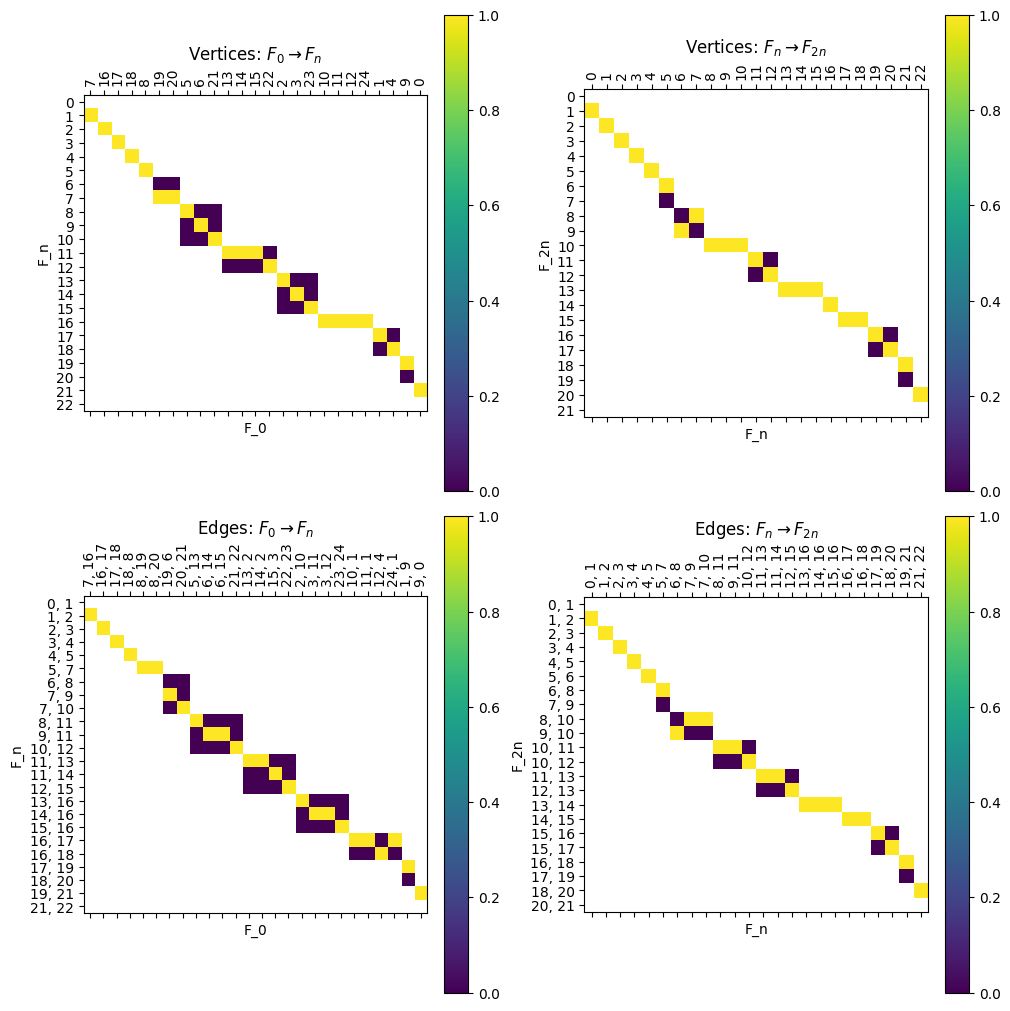

In [13]:
myInt.draw_all_I(filltype = 'nan', colorbar = True);

Note that we can get the composition of the maps for $F \Rightarrow F_{2n}$ or $G \Rightarrow G_{2n}$ by matrix multiplication. 

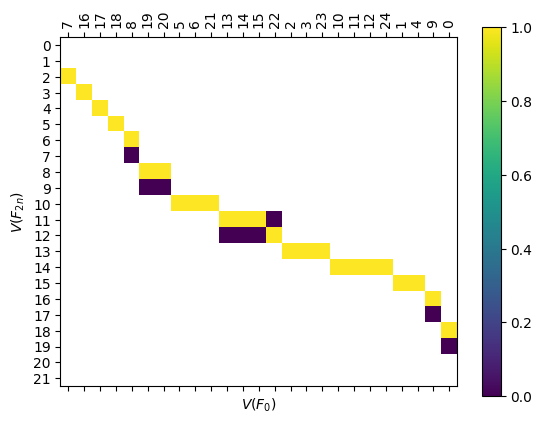

In [14]:
compI = myInt.I('F','n','V') @ myInt.I('F','0','V')
fig, ax = plt.subplots()
compI.draw(filltype = 'nan', colorbar = True, ax = ax)
ax.set_xlabel(r'$V(F_{0})$')
ax.set_ylabel(r'$V(F_{2n})$');

#### Boundary Matrices

We also have boundary matrices for each graph, where $B[v,e] = 1$ iff $v$ is a vertex of edge $e$. 

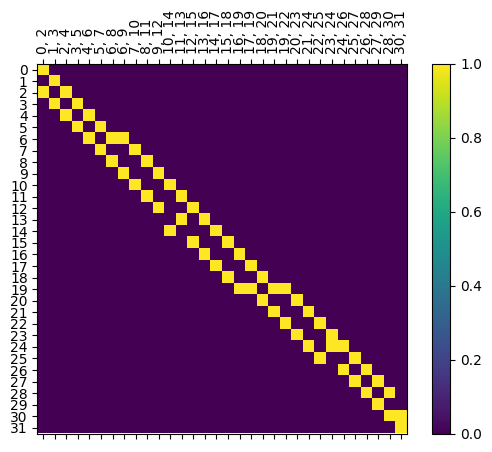

In [15]:
myInt.B('G','n').draw(colorbar = True);

Note that unlike the inclusion matrices, this matrix doesn't have nice block structure. In particular, if an edge is at height $i$, it's endpoints are at heights $i$ and $i+1$. However, we can pull out the two pieces of the boundary matrix to use, and these are stored as `LabeledBlockMatrix` types. 

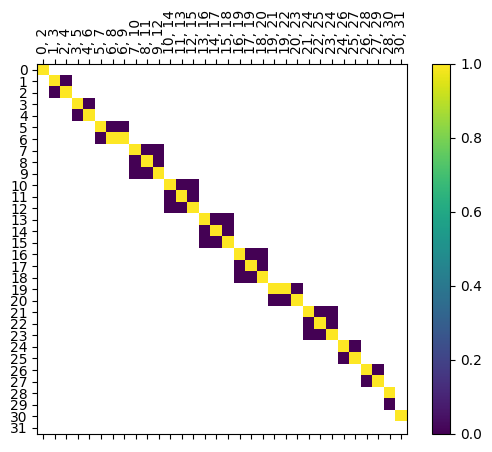

In [16]:
myInt.B_down('G','n').draw(filltype = 'nan', colorbar = True)

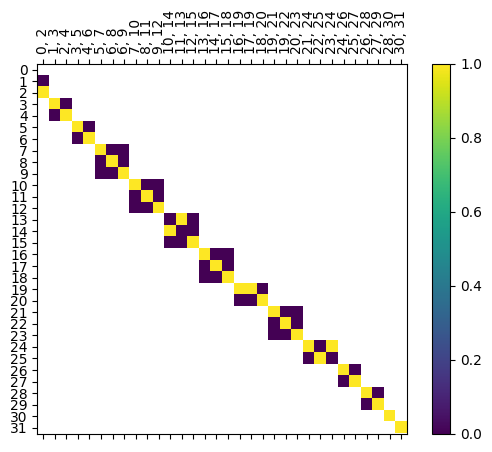

In [17]:
myInt.B_up('G','n').draw(filltype = 'nan', colorbar = True)

Note that block `i` for the `B_up` matrix has edges with height `i` since they are stored as the lower of the two function values of the endpoints; and vertices with height `i+1`

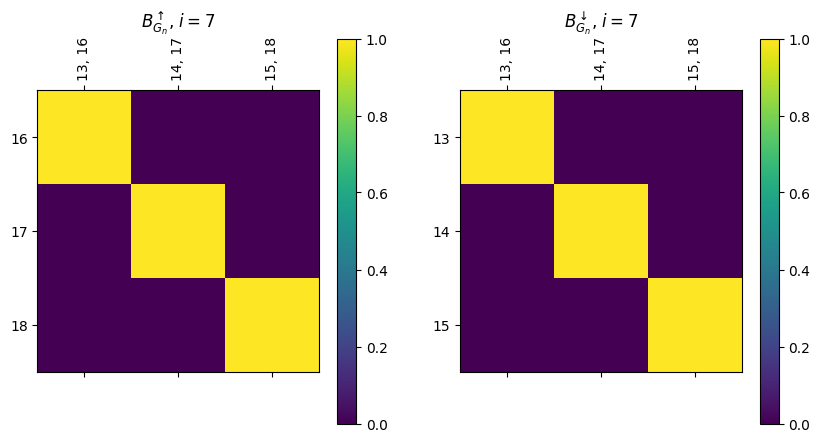

In [18]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))
myInt.B_up('G', 'n')[7].draw(colorbar = True, ax = ax[0])
ax[0].set_title(r'$B^{\uparrow}_{G_n}$, $i=7$')
myInt.B_down('G', 'n')[7].draw(colorbar = True, ax = ax[1])
ax[1].set_title(r'$B^{\downarrow}_{G_n}$, $i=7$');

We also have a drawing command, `Interleave.draw_B` to simplify the process, and `Interleave.draw_all_B` to show them all at once.

(<Figure size 2400x1800 with 6 Axes>,
 array([[<Axes: title={'center': '$B(F_0)$'}, xlabel='E(F_0)', ylabel='V(F_0)'>,
         <Axes: title={'center': '$B(F_n)$'}, xlabel='E(F_n)', ylabel='V(F_n)'>,
         <Axes: title={'center': '$B(F_{2n})$'}, xlabel='E(F_2n)', ylabel='V(F_2n)'>],
        [<Axes: title={'center': '$B(G_0)$'}, xlabel='E(G_0)', ylabel='V(G_0)'>,
         <Axes: title={'center': '$B(G_n)$'}, xlabel='E(G_n)', ylabel='V(G_n)'>,
         <Axes: title={'center': '$B(G_{2n})$'}, xlabel='E(G_2n)', ylabel='V(G_2n)'>]],
       dtype=object))

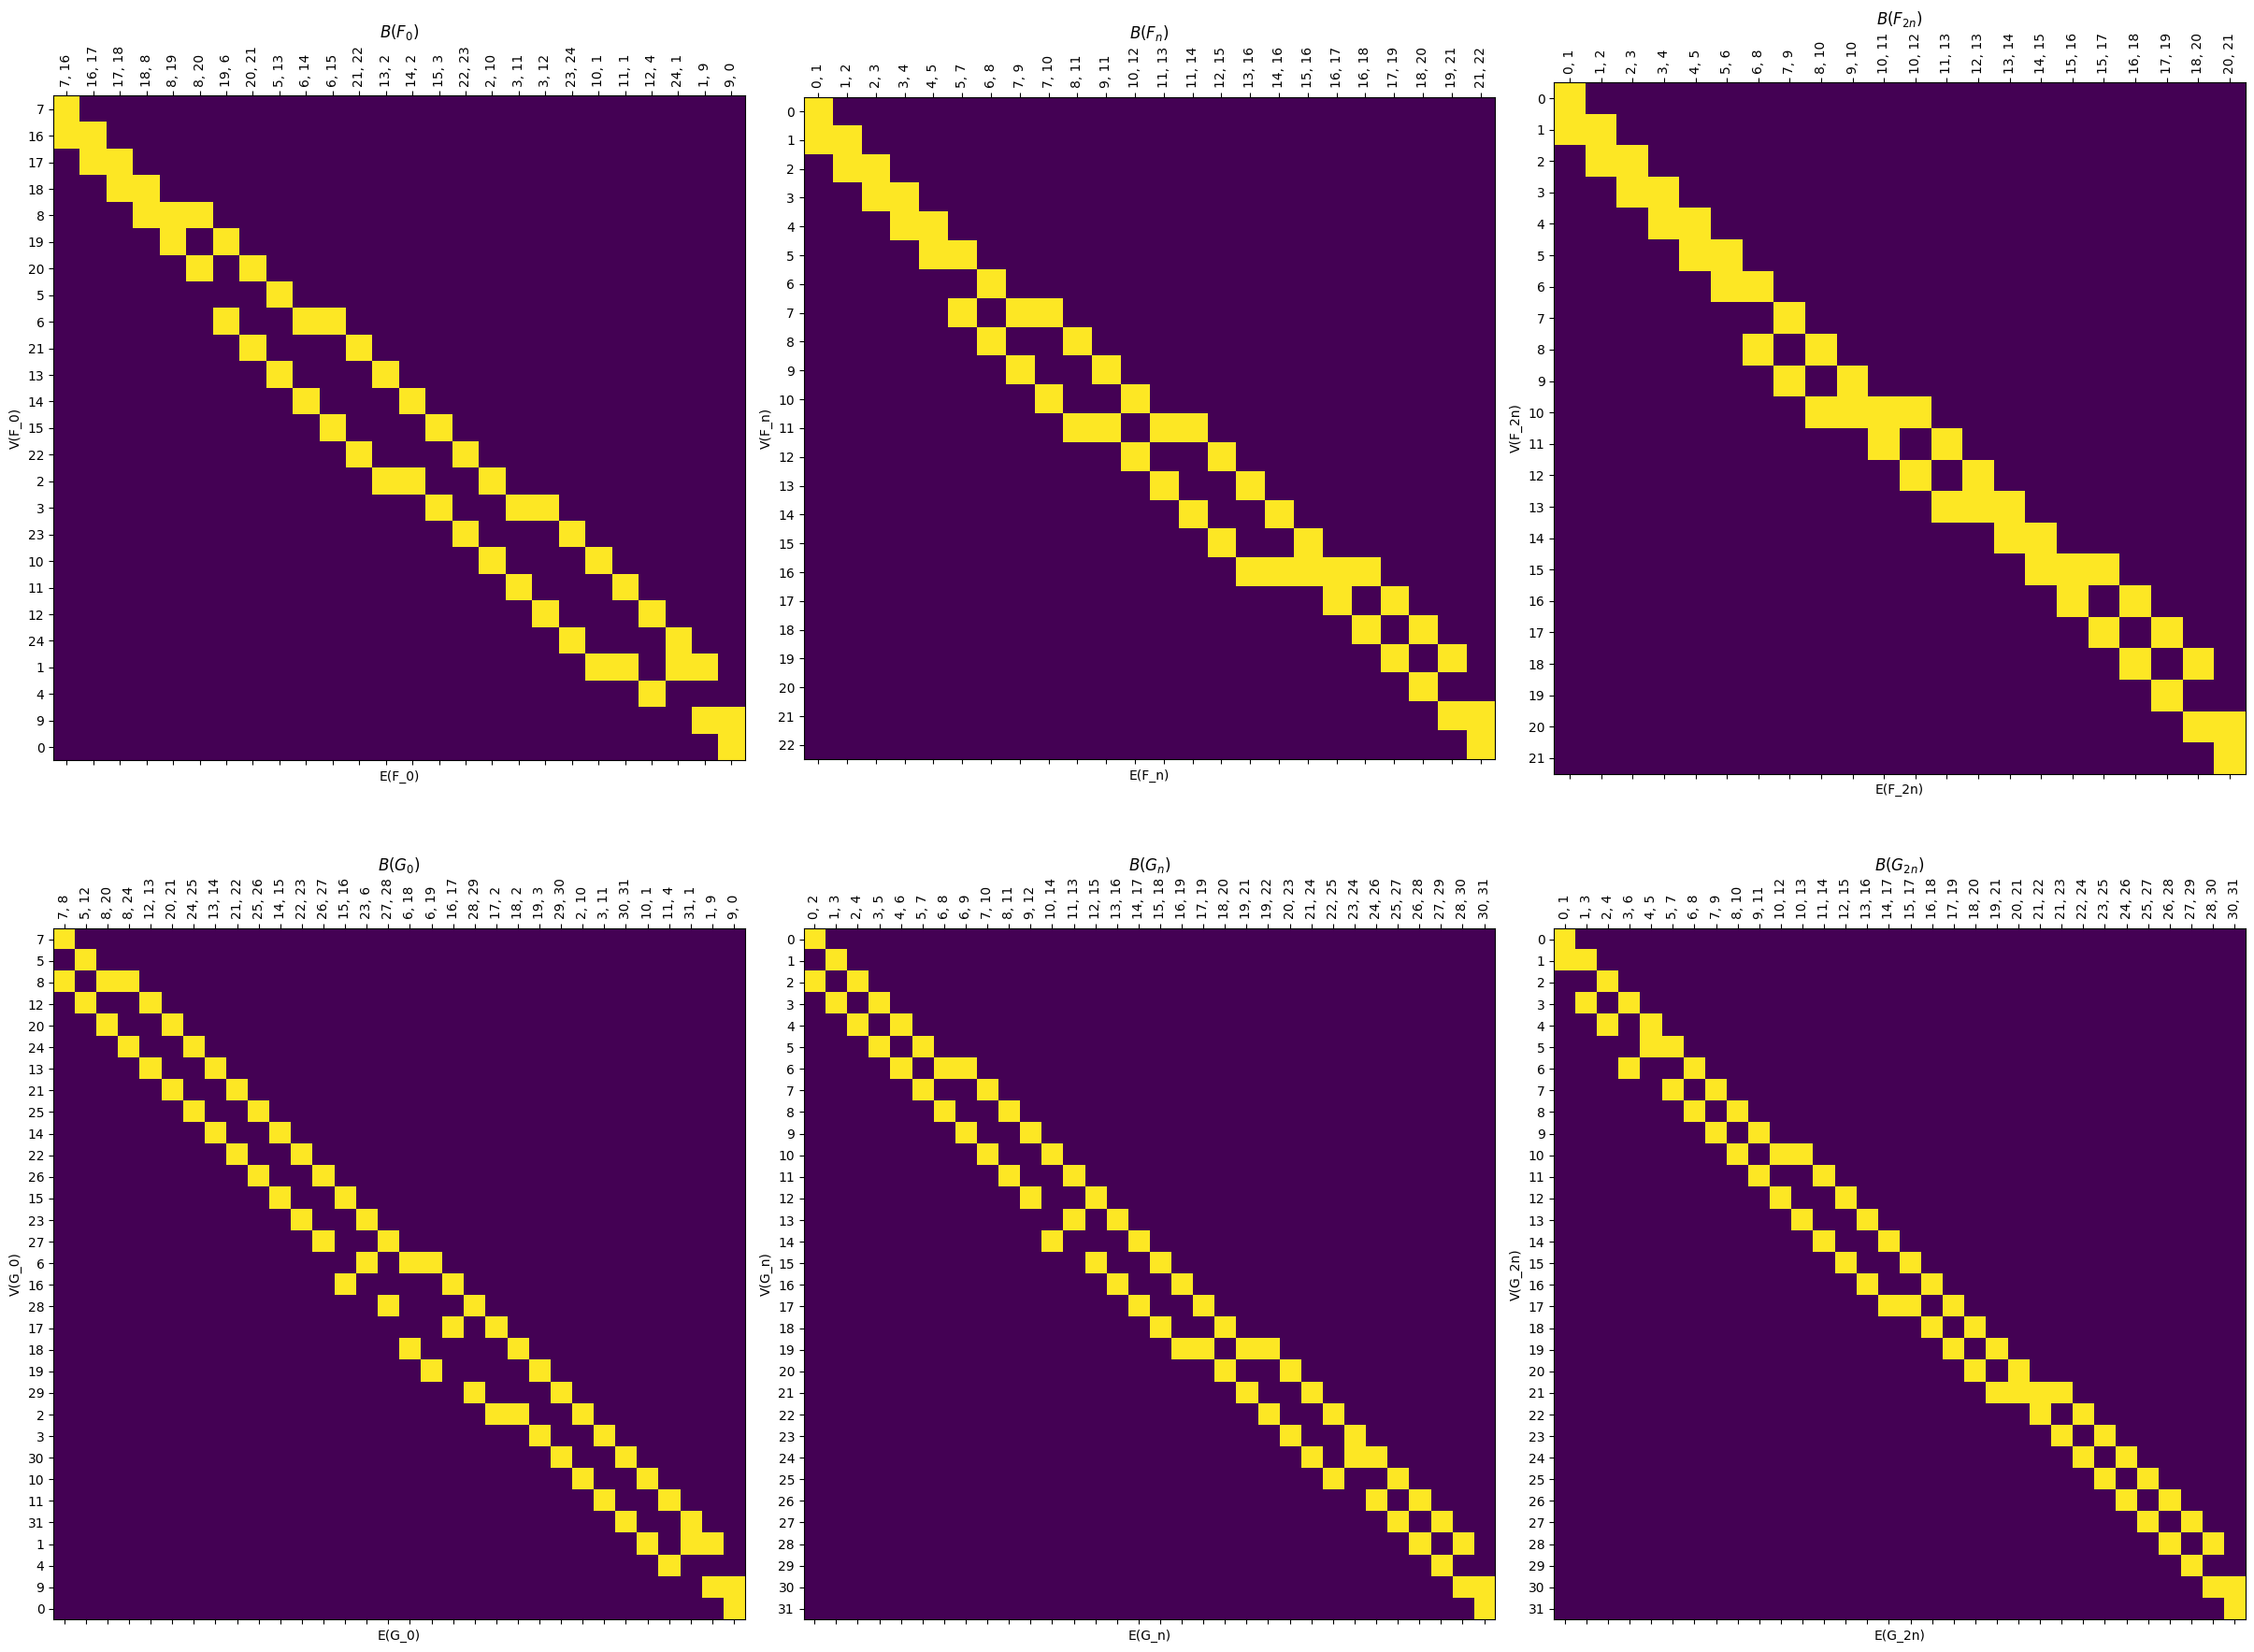

In [19]:
myInt.draw_all_B()

#### Distance matrix 

Following (our arXiv paper that we should cite), there is a distance between any vertices at the same level defined to be the amount of smoothing needed for the two vertices to be mapped to the same vertex. This block matrix is stored in `Interleave.D`. 

In [20]:
# Here's the distance between the vertices at function value 9 in $F$
print(myInt.D('F','0','V')[9])

LabeledMatrix(
array=
[[0. 1. 1. 3.]
 [1. 0. 1. 3.]
 [1. 1. 0. 3.]
 [3. 3. 3. 0.]], 
rows=[13, 14, 15, 22], 
cols=[13, 14, 15, 22])


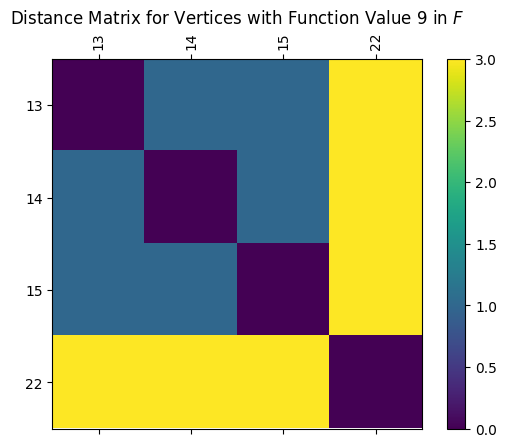

In [21]:
# and here's a visual for the same distance matrix
myInt.D('F','0','V')[9].draw(colorbar=True)
plt.title(r'Distance Matrix for Vertices with Function Value 9 in $F$');

As before, we can easily draw the full distance matrix using the `draw_D` command. Here's the full matrix for $G_{n}$.

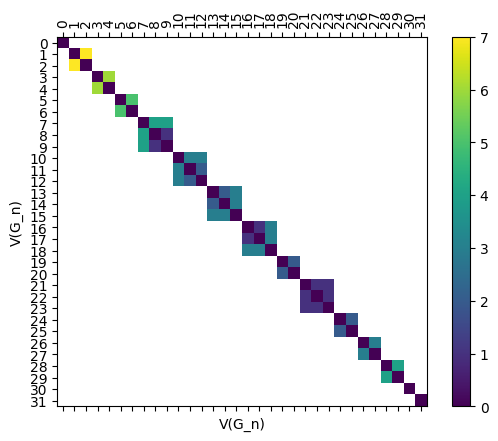

In [22]:
myInt.draw_D('G', 'n','V', filltype='nan', colorbar=True); 

Here's an edge version too. 

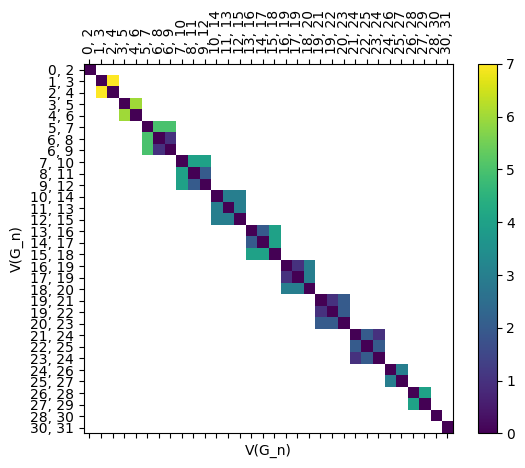

In [23]:
myInt.draw_D('G', 'n','E', filltype = 'nan');

## Torus and Line example

Let's go back to a simpler example for a while. We'll compare the distance between a torus and a line graph. 

In [24]:
T = ex_mg.torus(0, 2, 10, 12, delta = 1, seed = 17)
L = ex_mg.line(0, 12)

### Phi and psi
As before, we can initialize the interleaving. We also ask for randomly generated maps $\varphi: F \to G^n$ and $\psi: G \to F^n$. Note the default is `True`, so if set to `False` this would initialize matrices of the correct structure but filled with zeros.

In [25]:
myInt2 = Interleave(L,T, 
                    initialize_random_maps = True, 
                    seed = 0)

Let's draw all the relevant graphs just to be able to look at what's going on here. 

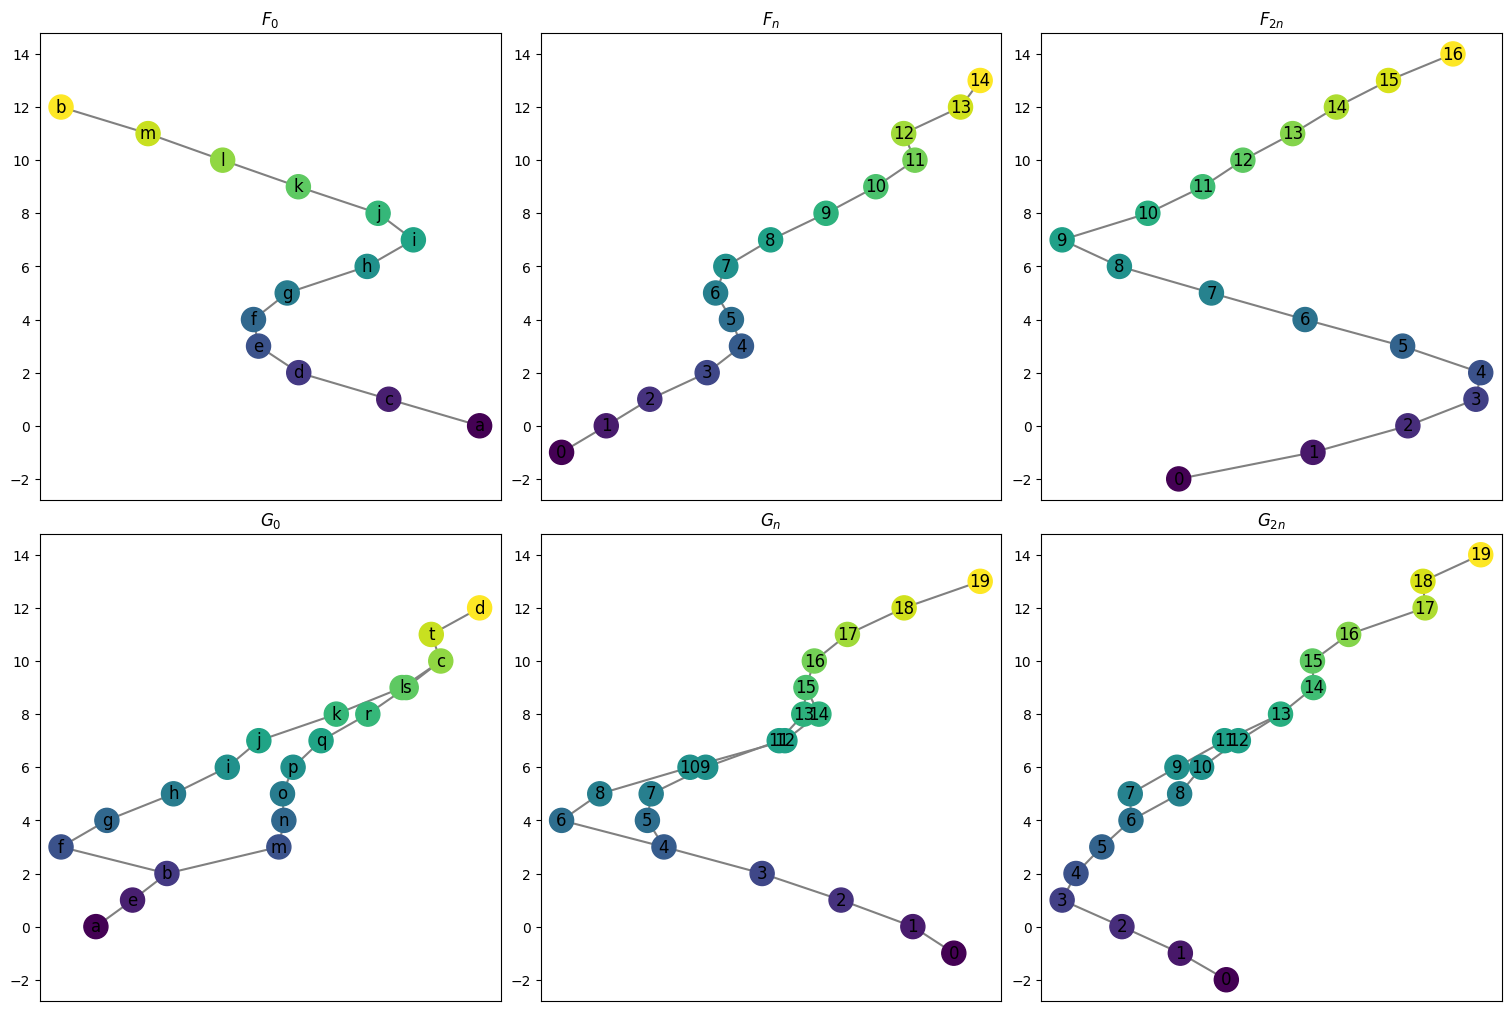

In [26]:
myInt2.draw_all_graphs();

These can be accessed using the `Interleave.phi` and `Interleave.psi` functions. As before, these are stored as `LabeledBlockMatrix` types. Note that in the example of a line and torus, the `psi` map has only one possible vertex for the image of any vertex or edge so the matrices are relatively simple. The choice comes with the `phi` map which has two options for image for the middle collection of vertices and edges.

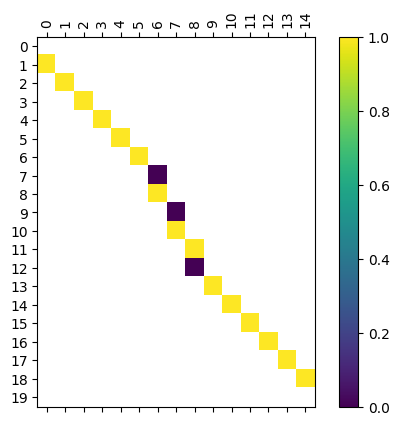

In [27]:
myInt2.phi('n','V').draw(filltype = 'nan', 
                         colorbar = True, )

We have a command to draw all the matrices at once for ease of visualization. 

(<Figure size 1000x1000 with 8 Axes>,
 array([[<Axes: title={'center': '$\\varphi_0^V$'}, xlabel='V(F)', ylabel='V(G_n)'>,
         <Axes: title={'center': '$\\varphi_n^V$'}, xlabel='V(F_n)', ylabel='V(G_2n)'>],
        [<Axes: title={'center': '$\\varphi_0^E$'}, xlabel='E(F)', ylabel='E(G_n)'>,
         <Axes: title={'center': '$\\varphi_n^E$'}, xlabel='E(F_n)', ylabel='E(G_2n)'>]],
       dtype=object))

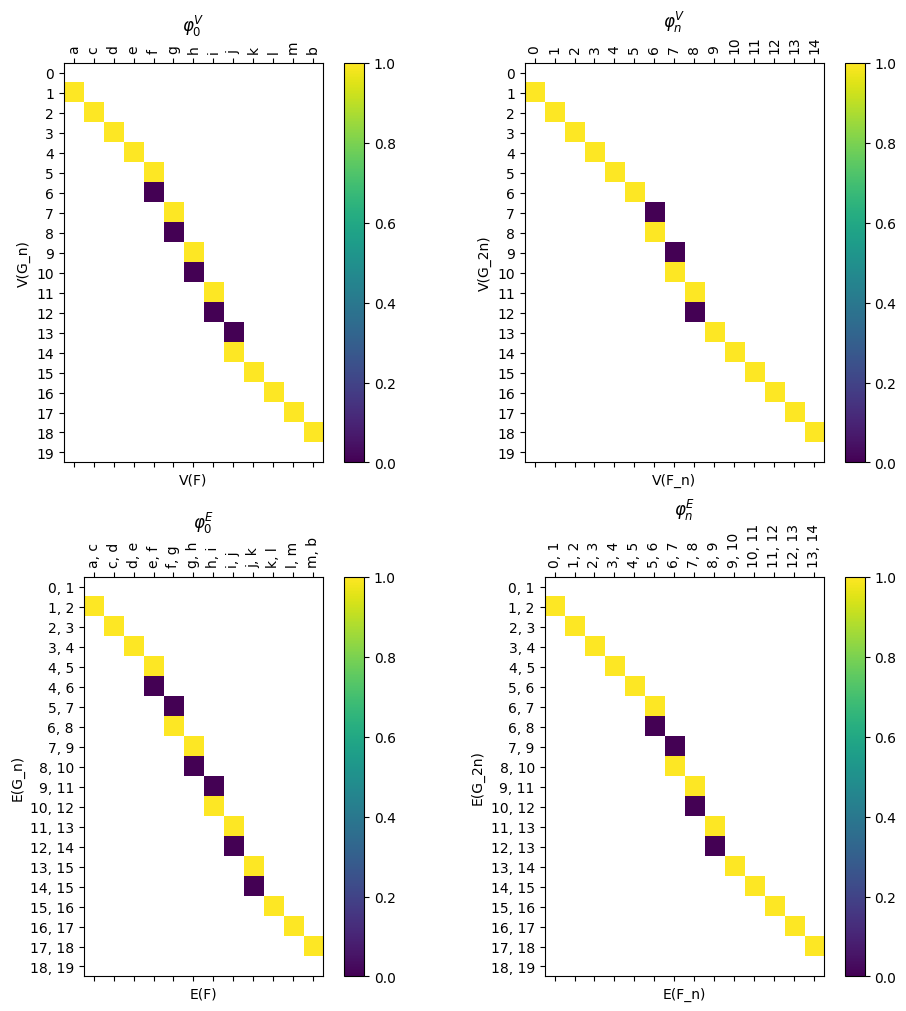

In [28]:
myInt2.draw_all_phi(filltype = 'nan', colorbar = True)

(<Figure size 1500x1000 with 8 Axes>,
 array([[<Axes: title={'center': '$\\psi_0^V$'}, xlabel='V(F)', ylabel='V(G_n)'>,
         <Axes: title={'center': '$\\psi_n^V$'}, xlabel='V(F_n)', ylabel='V(G_2n)'>],
        [<Axes: title={'center': '$\\psi_0^E$'}, xlabel='E(F)', ylabel='E(G_n)'>,
         <Axes: title={'center': '$\\psi_n^E$'}, xlabel='E(F_n)', ylabel='E(G_2n)'>]],
       dtype=object))

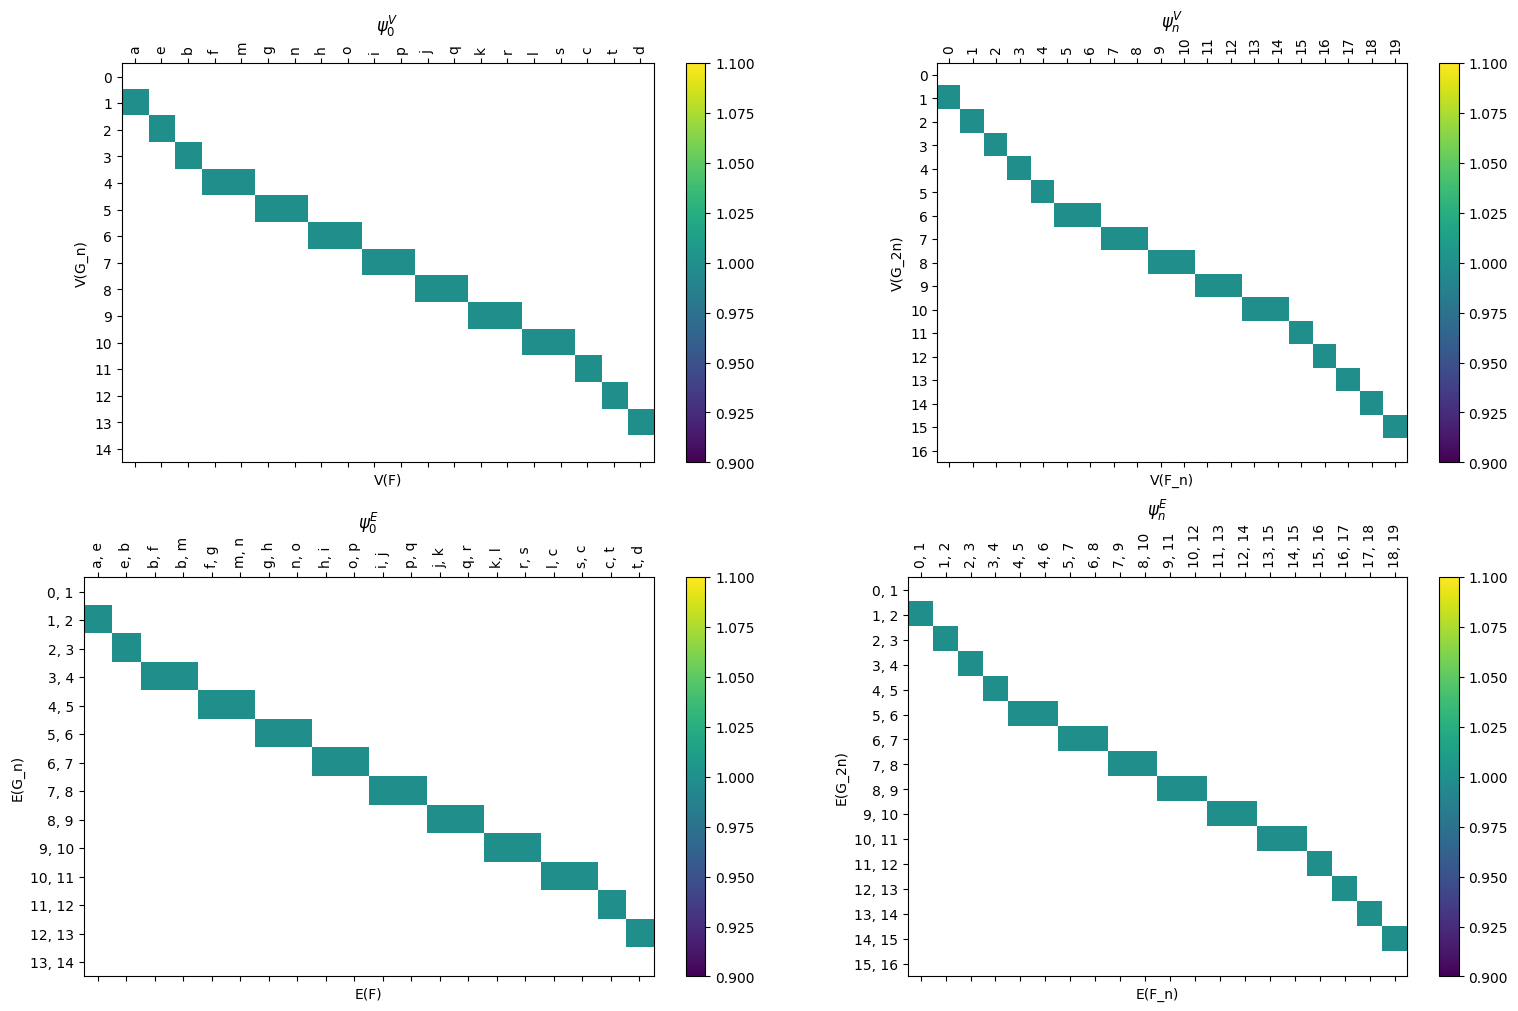

In [29]:
myInt2.draw_all_psi(figsize = (15,10), colorbar = True, 
                     filltype = 'nan')

### Checking all the diagrams

We have a giant list of diagrams to check. However, these are now reduced to multiplying all these matrices we've built above. 

The table below shows the diagrams to be checked, following the notation in the paper (**TODO cite paper when it's available!**). In the following sections of the tutorial, we go through each of the three types of diagrams. 

![The list of diagrams and relevant matrix multiplications](../images/TheList.png)

In the following sections, we show the code to compute each type of diagram loss. 

#### Parallelograms - Edge vertex

The first shown example is the same one done with the `myInt.parallelogram_matrix_Edge_Vert` command. Note that we can either pass in `phi` or `psi` to get the relevant diagrams. The `draw = True` is helpful for debugging and visualization. 

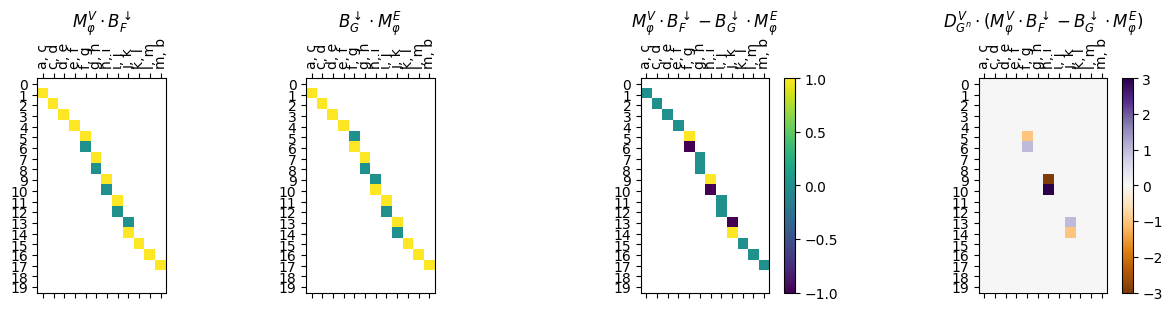

In [30]:
myInt2.parallelogram_Edge_Vert_matrix(maptype = 'phi', draw = True);

In [31]:
result = myInt2.parallelogram_Edge_Vert()
print(f"Maximum loss value for edge-vertex parallelogram: {result}")

Maximum loss value for edge-vertex parallelogram: 3.0


##### We can also compute the loss by each function value


In [32]:
result = myInt2.parallelogram_Edge_Vert(maptype='phi', up_or_down='up', func_val= 5)
print(f"Maximum loss value for edge-vertex parallelogram at function value {5}: {result}")

Maximum loss value for edge-vertex parallelogram at function value 5: 0.0


#### Parallelograms - Thickening 

These are the parallelograms that keep track of whether the maps from $S \to S^n$ form a natural transformation. 

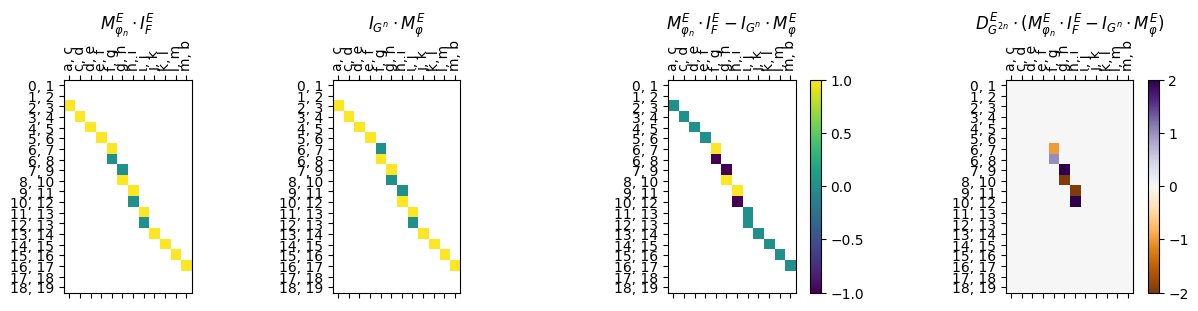

In [33]:
myInt2.parallelogram_matrix(maptype = 'phi', obj_type = 'E', draw = True);

In [34]:
result = myInt2.parallelogram(maptype = 'phi', obj_type = 'E', )
print(f"Maximum loss value for edges: {result}")

Maximum loss value for edges: 2.0


##### We can also compute the loss by each function value

In [35]:
result = myInt2.parallelogram(maptype='phi', obj_type='E', func_val=5)
print(f"Maximum loss value for edges at function value {5}: {result}")

Maximum loss value for edges at function value 5: 2.0


#### Triangles
Finally, the triangle diagrams are the ones that ensure that the assignment forms an interleaving. Note that the loss function computed is $\lceil \frac{k}{2} \rceil$ for $k$ the maximum absolute value in the multiplied matrix. 


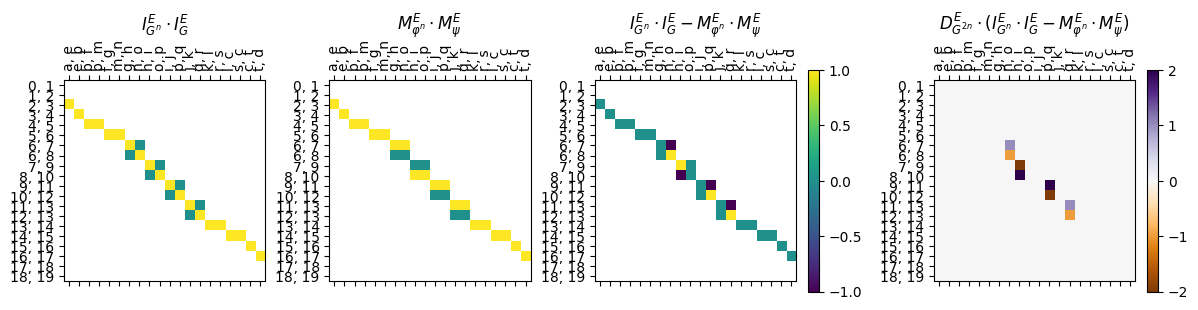

In [36]:
myInt2.triangle_matrix(start_graph = 'G', obj_type = 'E', draw = True);


In [37]:
myInt2.triangle(start_graph = 'G', obj_type = 'E');
print(f"Maximum loss value for triangle: {result}")
print("Note this is the ceiling of half of the largest entry in the matrix above.")

Maximum loss value for triangle: 2.0
Note this is the ceiling of half of the largest entry in the matrix above.


##### We can also compute the loss by each function value

In [38]:
result = myInt2.triangle(start_graph = 'G', obj_type = 'V', func_val=5)
print(f"Maximum loss value for vertices at function value {5}: {result}")

Maximum loss value for vertices at function value 5: 1.0


In [39]:
results = myInt2.triangle(start_graph = 'G', obj_type = 'E')
print(f"Maximum loss value for triangle: {results}")

Maximum loss value for triangle: 1.0


## The final loss computation

We do not need all the visuals above, the loss function can be easily computed as follows. 

In [40]:
myInt.loss(verbose = True)

       Dgm Type Req A Req B  Loss
0   Edge-Vertex   phi    up   0.0
1   Edge-Vertex   phi  down   0.0
2   Edge-Vertex   psi    up   0.0
3   Edge-Vertex   psi  down   0.0
4    Thickening   phi     V   0.0
5    Thickening   phi     E   0.0
6    Thickening   psi     V   0.0
7    Thickening   psi     E   0.0
8      Triangle     V     F   1.0
9      Triangle     V     G   3.0
10     Triangle     E     F   1.0
11     Triangle     E     G   3.0

Loss: 3.0
Interleaving distance bound: 1 + 3.0 = 4.0


3.0